21.03.26 자연어처리 - 한글 형태소 분석

# 한글 형태소 분석

## 자연어 처리
- 자연어(사람들이 일상적으로 사용하는 언어) 처리
- 자연어 처리 분야
    - 자연어 이해 : 형태소 분석 -> 의미 분석 -> 대화 분석
    - 자연어 생성 : 대화분석 -> 다음 문장이나 단어 출력
- 활용 분야 : 맞춤법 검사, 번역기, 검색 엔진, 키워드 분석 등

### 자연어  처리 절차
- 전처리 : 단어, 어절 추출
- 분석 후보 생성 : 형태소 분리, 원형 복원, 품사 태깅
- 제약조건(불용어 처리) 규칙 확인
- 분석

### 한글 형태소 분석 엔진
- KoNLPy : 파이썬용 (JPype1 패키지 의존)
- KOMORAN : 자바로 만든 형태소 분석기 (JAVA HOME 시스템 변수)
- HanNanum : 자바로 만든 형태소 분석기 (JAVA HOME 시스템 변수)
- Kkma : 서울 대학교 연구실
- KoNLP : R용 자연어 처리

In [2]:
! pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl
# KoNLPy install

Processing e:\bigdata\2.big_data(정규)\2.코드(source)\10_자연어처리\jpype1-1.2.0-cp38-cp38-win_amd64.whl
JPype1 is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


## 한나눔 패키지(Hannanum package)

In [3]:
text = """ 아릅답지만 다소 복잡하기도한 한국어는 전세계에서 13번째로 많이 사용되는 언어 입니다."  """

In [4]:
from konlpy.tag import Hannanum
han = Hannanum()
print(han.analyze(text))

[[[('아릅답', 'ncn'), ('지만', 'jxc')], [('아릅답지', 'ncn'), ('만', 'jxc')], [('아릅답지만', 'ncn')], [('아릅답', 'nqq'), ('지만', 'jxc')], [('아릅답지', 'nqq'), ('만', 'jxc')], [('아릅답지만', 'nqq')]], [[('다소', 'mag')], [('다소', 'ncn')]], [[('복잡하기도한', 'ncn')], [('복잡하기도한', 'nqq')]], [[('한국어', 'ncn'), ('는', 'jxc')]], [[('전세계', 'ncn'), ('에서', 'jca')], [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')], [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]], [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]], [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]], [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]], [[('언어', 'ncn')]], [[('입', 'pvg'), ('니다', 'ef')], [('일', 'pvg'), ('ㅂ니다', 'ef')], [('이', 'pvg'), ('ㅂ니다', 'ef')]], [[('.', 'sf'), ('"', 'sl')], [('.', 'sf'), ('"', 'sr')], [('.', 'sy'), ('"', 'sl')], [('.', 'sy'), ('"', 'sr')]]]


In [5]:
# 품사태깅
print(han.pos(text, ntags=9))

[('아릅답지', 'N'), ('만', 'J'), ('다소', 'M'), ('복잡하기도한', 'N'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('일', 'P'), ('ㅂ니다', 'E'), ('."', 'S')]


In [6]:
print(han.pos(text, ntags=22))

[('아릅답지', 'NC'), ('만', 'JX'), ('다소', 'MA'), ('복잡하기도한', 'NC'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('일', 'PV'), ('ㅂ니다', 'EF'), ('.', 'SF'), ('"', 'SL')]


In [7]:
# Q.text 중에 형용사(PA)만 추출
tagged_text = han.pos(text, ntags=22)
l = []
for t in tagged_text:
   if t[1]  == 'PA':
        l.append(t[0])
l        

['많']

In [7]:
[t[0] for t in tagged_text if t[1] == 'PA']

['많']

In [8]:
# 명사만 추출
han.nouns(text)

['아릅답지', '복잡하기도한', '한국어', '전세계', '13번', '사용', '언어']

## Kkma

In [8]:
from konlpy.tag import Kkma
kkma = Kkma(max_heap_size=1024) # 힙메모리 사이즈 늘릴 때 사용
print(kkma.morphs(text)) # 형태소 분석만

['아릅답지', '만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.', '"']


In [9]:
print(kkma.pos(text, 56)) # ntags기본값은 30

[('아릅답지', 'UN'), ('만', 'JX'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF'), ('"', 'SS')]


In [11]:
# 보통명사만 추출
tagged_text = kkma.pos(text, 56)
[t[0] for t in tagged_text if t[1]=='NNG']

['복잡', '한국어', '전세계', '사용', '언어']

In [10]:
# 명사들 다 추출
kkma.nouns(text)

['아릅답지', '복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']

## Komoran

In [11]:
from konlpy.tag import Komoran
komoran = Komoran(max_heap_size=2048) # heap memory 
print(komoran.morphs(text))

['아릅답지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.', '"']


In [12]:
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [13]:
print(komoran.pos(text))

[('아릅답지만', 'NA'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('하', 'VV'), ('ㄴ', 'ETM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF'), ('"', 'SS')]


In [14]:
# 일반명사(NNG)만 추출
tagged_text = komoran.pos(text)
[t[0] for t in tagged_text if t[1]=='NNG']

['전', '세계', '사용', '언어']

In [15]:
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


## 말뭉치

In [16]:
print(r'Hello\nWorld') # r:raw data
print('Hello\nWorld')

Hello\nWorld
Hello
World


In [17]:
from konlpy.corpus import kolaw
data = kolaw.open('constitution.txt').read()
print(len(data))
print(data[:20])

18884
대한민국헌법

유구한 역사와 전통에 


In [18]:
from konlpy.corpus import kobill
data1 = kobill.open('1809892.txt').read()[:1000]
data1

'교육공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9892\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  현행 교육공무원의 육아휴직은 만 6세 이하의 초등학교 취학 전 자\n\n녀의 육아를 위한 경우로 한정되어 있어 초등학교 취학 후 등하교 및 \n\n방과 후 양육 등에 어려움이 많고, 저학년 자녀 혼자 등하교를 하거나 \n\n어른 없는 집에서 지내다가 성폭력 범죄 등 흉악범죄의 피해자가 되\n\n고 있음. \n\n  이에 육아휴직 가능 시기를 만 8세 이하의 자녀로 확대하여 자녀가 \n\n초등학교에 입학하여 학교생활에 순조롭게 적응할 수 있는 나이까지 \n\n교육공무원이 자녀양육을 위해서 휴직할 수 있도록 하려는 것임(안 제\n\n44조제1항제7호). \n\n- 1 -\n\n\x0c법률  제        호\n\n교육공무원법 일부개정법률안\n\n교육공무원법 일부를 다음과 같이 개정한다.\n\n제44조제1항제7호 중 “자녀(만 6세 이하의 초등학교 취학 전 자녀)”를 \n\n“만 8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자\n\n녀”로 한다.\n\n제45조제1항제6호 중 “1년 이내로 한다. 다만, 여자 교육공무원의 경\n\n우 任用權者는 2年의 범위내에서 그 休職期間을 연장할 수 있다.”를 \n\n“1년 이내(여자 교육공무원 3년 이내)로 하되, 분할하여 휴직할 수 있\n\n다.”로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n第44條(休職) ① 敎育公務員이 다\n\n第44條(休職) ① ---------------\n\n음 각 호의 어느 하나에 해당\n\n----------------------------\n\n하

## 워드 클라우드

In [19]:
type(data)

str

In [20]:
i = 20
print("i={:d}".format(i))
print("i=%d" % (i))

i=20
i=20


In [21]:
word_list = komoran.nouns("%r" % data)
print('명사 출현 수 : ',len(word_list) )
print('출현 명사 종류 수 :', len(set(word_list)) )
print('한 단어당 평균 반복 횟수 :', len(word_list) / len(set(word_list)) )
print(type(word_list))

명사 출현 수 :  3361
출현 명사 종류 수 : 891
한 단어당 평균 반복 횟수 : 3.772166105499439
<class 'list'>


In [22]:
print(word_list[:20])

['대한민국', '헌법', '유구', '한', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시', '정부', '법통', '불의', '항거', '민주', '이념', '계승', '조국', '민주개혁']


In [23]:
text = ' '.join(word_list)
text[:200]

'대한민국 헌법 유구 한 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주개혁 평화 통일 사명 입각 정의 인도 동포애 민족 단결 사회 폐습 불의 타파 자율 조화 바탕 자유 민주 기본 질서 정치 경제 사회 문화 영역 각인 기회 능력 최고 도로 발휘 자유 권리 책임 의무 완수 안 국민 생활 균등 향상 밖 항구 세계 평화 인'

In [ ]:
# 아나콘다 프롬프트에서 pip install WordCloud 한다

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

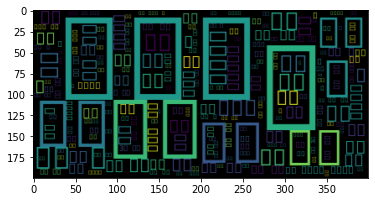

In [25]:
wordc = WordCloud(     )
wordc.generate(text)
plt.figure()
plt.imshow(wordc, interpolation='bilinear')

In [26]:
wordc = WordCloud(background_color='white',
                 max_words=300,
                 font_path="c:/Windows/fonts/malgun.ttf",
                 relative_scaling=0.2)
wordc.generate(text)

(-0.5, 399.5, 199.5, -0.5)

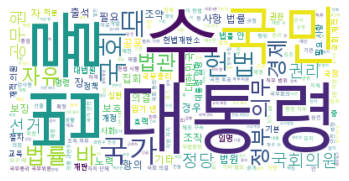

In [27]:
plt.figure()
plt.imshow(wordc, interpolation='bilinear')
plt.axis('off')

일반명사 출현 수 :  2316
출현한 일반명사 종류 수 : 661
한 단어당 평균 반복 횟수 : 3.503782148260212
<class 'list'>


(-0.5, 399.5, 199.5, -0.5)

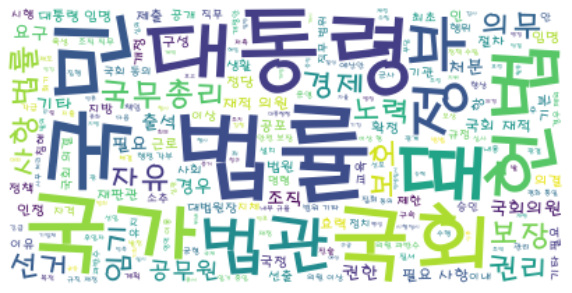

In [28]:
# 일반명만 추출
tagged_data = komoran.pos(data)
word_list = [t[0] for t in tagged_data if t[1]=='NNG']
print('일반명사 출현 수 : ',len(word_list) )
print('출현한 일반명사 종류 수 :', len(set(word_list)) )
print('한 단어당 평균 반복 횟수 :', len(word_list) / len(set(word_list)) )
print(type(word_list))
text = ' '.join(word_list)
# 워드 클라우드
wordc = WordCloud(background_color='white',
                 max_words=300,
                 font_path='c:/Windows/Fonts/H2PORM.TTF',
                 relative_scaling=0.2)
wordc.generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordc, interpolation='bilinear') # bilinear 보강법
plt.axis('off')

In [29]:
# 불용어 처리 (불용어 사전 + 불용어)
from wordcloud import STOPWORDS
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
불용어 = STOPWORDS | ENGLISH_STOP_WORDS | set(['대통령', '법관'])
불용어 = set(['대통령', '법관'])

C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


(-0.5, 399.5, 199.5, -0.5)

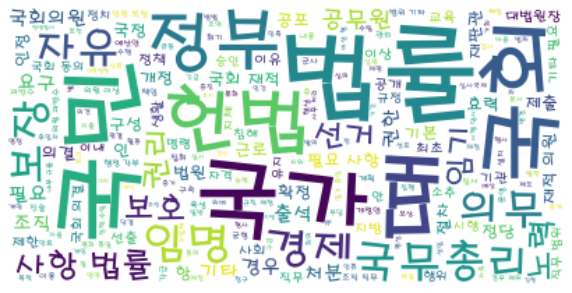

In [30]:
# 워드 클라우드
wordc = WordCloud(background_color='white',
                 max_words=300,
                 font_path='c:/Windows/Fonts/H2PORM.TTF',
                 relative_scaling=0.2,
                 stopwords=불용어)
wordc.generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordc, interpolation='bilinear') # bilinear 보강법
plt.axis('off')

In [31]:
import os
os.getcwd()

'E:\\BigData\\2.Big_data(정규)\\2.코드(source)\\10_자연어처리'

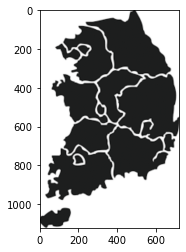

In [32]:
# 마스킹 : 워드 클라우드를 지정된 마스크 이미지에 맞도록 표시
from PIL import Image
import numpy as np
img = Image.open('data/south_korea.png').convert('RGBA')
# png파일 : 'RGBA'로   jpg파일: 'RGB'
mask = Image.new('RGB', img.size, (0,0,0))
mask.paste(img)
plt.imshow(mask)
mask = np.array(mask)

(-0.5, 719.5, 1123.5, -0.5)

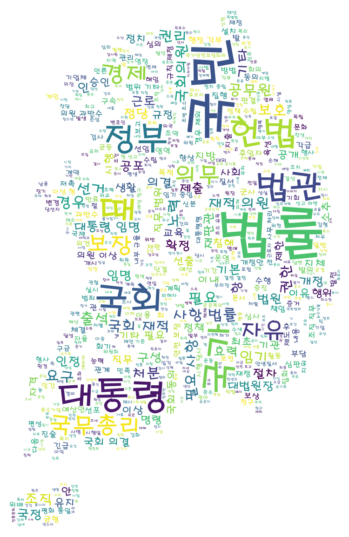

In [33]:
wordcloud = WordCloud(background_color='white',
                     max_words=700,
                     font_path='c:/Windows/Fonts/H2PORM.TTF',
                     relative_scaling=0.1,
                     mask=mask)
wordcloud.generate(text)
plt.figure(figsize=(6,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [34]:
wordcloud.to_file('data/south_korea_wordcloud.png')

(-0.5, 899.5, 899.5, -0.5)

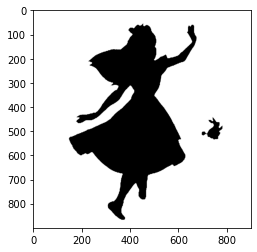

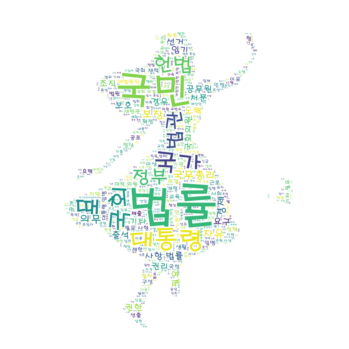

In [35]:
# 마스킹 : 워드 클라우드를 지정된 마스크 이미지에 맞도록 표시
from PIL import Image
import numpy as np
img = Image.open('data/test3.png').convert('RGBA')
# png파일 : 'RGBA'로   jpg파일: 'RGB'
mask = Image.new('RGB', img.size, (0,0,0))
mask.paste(img)
plt.imshow(mask)
mask = np.array(mask)
wordcloud = WordCloud(background_color='white',
                     max_words=700,
                     font_path='c:/Windows/Fonts/H2PORM.TTF',
                     relative_scaling=0.1,
                     mask=mask,
                     stopwords='대통령')
wordcloud.generate(text)
plt.figure(figsize=(6,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## 단어 빈도수 계산

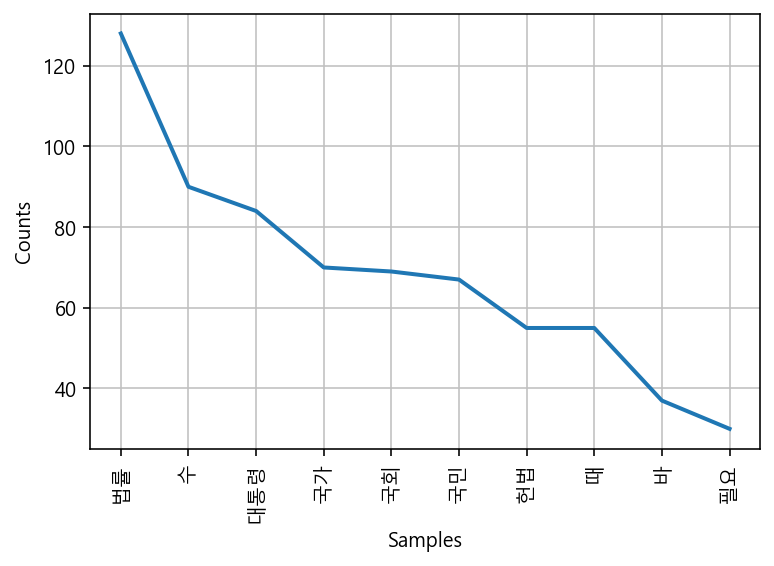

In [36]:
import nltk
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
plt.rc("font", family="Malgun Gothic")
word_list = komoran.nouns(data)
nltk.Text(word_list).plot(10)

## 워드 임베딩
- 단어간 유사성 도출

In [39]:
# 뉴스 기사 link들 list 가져오기
import requests
from bs4 import BeautifulSoup
rss_url = "https://fs.jtbc.joins.com/RSS/economy.xml"
jtbc_economy = requests.get(rss_url)
economy_soup = BeautifulSoup(jtbc_economy.content, "xml")
link_list = economy_soup.select('item > link')
link_list = [link.text for link in link_list]
link_list

['https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997856',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997858',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997873',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997839',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997816',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997838',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997841',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997663',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997660',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997664',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997622',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997623',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997533',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB119

In [38]:
len(link_list)

20

In [40]:
# 뉴스 기사들 명사들만 뽑아 워드 임베딩하기 좋게 만들기
from konlpy.tag import Kkma
kkma = Kkma()
news = []

for link in link_list:
    news_response = requests.get(link)
    news_soup = BeautifulSoup(news_response.content, "html.parser")
    news_title = news_soup.select_one('h3#jtbcBody')
    news_content = news_soup.select_one('div#articlebody > div.article_content')
    content = news_title.text + ' ' + news_content.text
    news.append(kkma.nouns(content))

In [41]:
print([len(n) for n in news])

[160, 135, 113, 123, 209, 164, 156, 140, 97, 172, 141, 179, 122, 132, 38, 94, 134, 165, 69, 224]


In [42]:
# 워드 임베딩하기
from gensim.models import Word2Vec
model = Word2Vec(news, size=100, window=5, min_count=2, workers=-1)

In [43]:
model.wv.most_similar("코로나")

[('수진', 0.2887732684612274),
 ('원', 0.2465248554944992),
 ('지역업체', 0.24279075860977173),
 ('대비', 0.23856110870838165),
 ('안주가', 0.23643434047698975),
 ('고양', 0.23473796248435974),
 ('글', 0.23447272181510925),
 ('종합', 0.23328834772109985),
 ('소', 0.22718322277069092),
 ('24', 0.20669400691986084)]

In [44]:
model.wv.most_similar("코로나", topn=5)

[('수진', 0.2887732684612274),
 ('원', 0.2465248554944992),
 ('지역업체', 0.24279075860977173),
 ('대비', 0.23856110870838165),
 ('안주가', 0.23643434047698975)]